In [122]:
import vrep
import sys
import time
import numpy as np

import skfuzzy as fuzz
import skfuzzy.control as ctrl

In [123]:
DESTINATION_POINT = 0.1

In [124]:
# # Triangle membership function

# distance = ctrl.Antecedent(np.arange(0, 1.5, 0.1), 'distance')
# speed = ctrl.Consequent(np.arange(0, 1.5, 0.1), 'speed')

# distance['close'] = fuzz.trimf(distance.universe, [0, 0, 0.6])
# distance['medium'] = fuzz.trimf(distance.universe, [0.4, 0.75, 1.1])
# distance['far'] = fuzz.trimf(distance.universe, [0.9, 1.5, 1.5])

# distance.view()

# speed['low'] = fuzz.trimf(speed.universe, [-1000, -500, 0.5])
# speed['medium'] = fuzz.trimf(speed.universe, [0.2, 0.7, 1.2])
# speed['high'] = fuzz.trimf(speed.universe, [0.7, 1, 1.3])

# speed.view()

# rule1 = ctrl.Rule(distance['close'], speed['low'])
# rule2 = ctrl.Rule(distance['medium'], speed['medium'])
# rule3 = ctrl.Rule(distance['far'], speed['high'])

# control_system = ctrl.ControlSystem([rule1, rule2, rule3])
# control = ctrl.ControlSystemSimulation(control_system)

# control.input['distance'] = 1.3  # random value
# control.compute()
# print(control.output['speed'])

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.06666666666666668


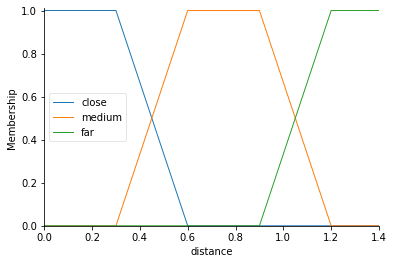

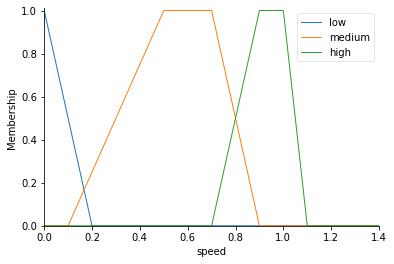

In [132]:
# Trapezoid membership function

distance = ctrl.Antecedent(np.arange(0, 1.5, 0.1), 'distance')
speed = ctrl.Consequent(np.arange(0, 1.5, 0.1), 'speed')

distance['close'] = fuzz.trapmf(distance.universe, [0, 0, 0.3, 0.6])
distance['medium'] = fuzz.trapmf(distance.universe, [0.3, 0.6, 0.9, 1.2])
distance['far'] = fuzz.trapmf(distance.universe, [0.9, 1.2, 1.5, 2.0])

distance.view()

speed['low'] = fuzz.trapmf(speed.universe, [-2, -1, 0, 0.2])
speed['medium'] = fuzz.trapmf(speed.universe, [0.1, 0.5, 0.7, 0.9])
speed['high'] = fuzz.trapmf(speed.universe, [0.7, 0.9, 1, 1])

speed.view()

rule1 = ctrl.Rule(distance['close'], speed['low'])
rule2 = ctrl.Rule(distance['medium'], speed['medium'])
rule3 = ctrl.Rule(distance['far'], speed['high'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3])
control = ctrl.ControlSystemSimulation(control_system)

control.input['distance'] = 0.1  # random value
control.compute()
print(control.output['speed'])

In [127]:
def set_speed(velocity):
    vrep.simxSetJointTargetVelocity(clientID, lb_motor_handle, velocity, vrep.simx_opmode_streaming)
    vrep.simxSetJointTargetVelocity(clientID, rb_motor_handle, velocity, vrep.simx_opmode_streaming)
    vrep.simxSetJointTargetVelocity(clientID, lf_motor_handle, velocity, vrep.simx_opmode_streaming)
    vrep.simxSetJointTargetVelocity(clientID, rf_motor_handle, velocity, vrep.simx_opmode_streaming)

In [128]:
vrep.simxFinish(-1)  # closes all opened connections, in case any previous wasn't finished
clientID = vrep.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # start a connection

if clientID != -1:
    print("Connected to remote API server")
else:
    print("Not connected to remote API server")
    sys.exit("Could not connect")

# get handles to robot drivers
lf_err_code, lf_motor_handle = vrep.simxGetObjectHandle(clientID, "WheelJoint_LF", vrep.simx_opmode_blocking)
lb_err_code, lb_motor_handle = vrep.simxGetObjectHandle(clientID, "WheelJoint_LB", vrep.simx_opmode_blocking)
rb_err_code, rb_motor_handle = vrep.simxGetObjectHandle(clientID, "WheelJoint_RB", vrep.simx_opmode_blocking)
rf_err_code, rf_motor_handle = vrep.simxGetObjectHandle(clientID, "WheelJoint_RF", vrep.simx_opmode_blocking)

# Turn on the drives
# err_code = vrep.simxSetJointTargetVelocity(clientID, lb_motor_handle, 1.0, vrep.simx_opmode_streaming)
# err_code = vrep.simxSetJointTargetVelocity(clientID, rb_motor_handle, 1.0, vrep.simx_opmode_streaming)
# err_code = vrep.simxSetJointTargetVelocity(clientID, lf_motor_handle, 1.0, vrep.simx_opmode_streaming)
# err_code = vrep.simxSetJointTargetVelocity(clientID, rf_motor_handle, 1.0, vrep.simx_opmode_streaming)

Connected to remote API server


In [129]:
# get handle to the load
load_err_code, load_handle = vrep.simxGetObjectHandle(clientID, "Load", vrep.simx_opmode_blocking)

# get first position of load
err_code, position = vrep.simxGetObjectPosition(clientID, load_handle, -1, vrep.simx_opmode_streaming)

# get positions of load
t = time.time()
while True:  # read values for 15 seconds
    err_code, position = vrep.simxGetObjectPosition(clientID, load_handle, -1, vrep.simx_opmode_buffer)
    if err_code == 0:
        distance = position[0] - DESTINATION_POINT
        control.input['distance'] = distance
        control.compute()
        speed = control.output['speed']
        set_speed(speed)
        print('Position =', position[0], '\t\tSpeed =', speed)

Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.9199999999999998
Position = 1.3986221551895142 		Speed = 0.91999999999999

Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.91999999999999

Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.9199999999999998
Position = 1.3987120389938354 		Speed = 0.91999999999999

Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.9199999999999998
Position = 1.3990743160247803 		Speed = 0.91999999999999

Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.91999999999999

Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.3992512226104736 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Posit

Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.399459719657898 		Speed = 0.9199999999999998
Position = 1.3

Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.91999999999999

Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.9199999999999998
Position = 1.3998545408248901 		Speed = 0.91999999999999

Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.91999999999999

Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.91999999999999

Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.9199999999999998
Position = 1.4004242420196533 		Speed = 0.91999999999999

Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.9199999999999998
Position = 1.4008605480194092 		Speed = 0.91999999999999

Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.9199999999999998
Position = 1.4006483554840088 		Speed = 0.91999999999999

Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.399358868598938 		Speed = 0.9199999999999998
Position = 1.3

Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.91999999999999

Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.9199999999999998
Position = 1.3967329263687134 		Speed = 0.91999999999999

Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.9199999999999998
Position = 1.3925259113311768 		Speed = 0.91999999999999

Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.91999999999999

Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.91999999999999

Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.9199999999999998
Position = 1.3863335847854614 		Speed = 0.91999999999999

Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.9199999999999998
Position = 1.3778088092803955 		Speed = 0.91999999999999

Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.3

Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.366889238357544 		Speed = 0.9199999999999998
Position = 1.3

Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.9199999999999998
Position = 1.3537142276763916 		Speed = 0.91999999999999

Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.91999999999999

Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.91999999999999

Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.9199999999999998
Position = 1.3385812044143677 		Speed = 0.91999999999999

Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.9199999999999998
Position = 1.3218625783920288 		Speed = 0.91999999999999

Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.3

Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.3

Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.304137110710144 		Speed = 0.9199999999999998
Position = 1.3

Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2860958576202393 		Speed = 0.878415973837119
Position = 1.2

Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2

Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2683824300765991 		Speed = 0.835328989470827
Position = 1.2

Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.80180318693429

Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.80180318693429

Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.8018031869342976
Position = 1.2515629529953003 		Speed = 0.80180318693429

Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.77581497496877

Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.7758149749687724
Position = 1.2362252473831177 		Speed = 0.77581497496877

Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.75612029355576

Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.7561202935557602
Position = 1.2230185270309448 		Speed = 0.75612029355576

Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.74185919790764

Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.7418591979076475
Position = 1.2124994993209839 		Speed = 0.74185919790764

Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.73232955206083

Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.7323295520608322
Position = 1.2049897909164429 		Speed = 0.73232955206083

Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.72694147017771

Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.7269414701777108
Position = 1.2005665302276611 		Speed = 0.72694147017771

Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.198986291885376 		Speed = 0.7250541306461349
Position = 1.1

Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.7261389648054907
Position = 1.1998965740203857 		Speed = 0.72613896480549

Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.7296773842829268
Position = 1.2028287649154663 		Speed = 0.72967738428292

Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.73507035558332

Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.7350703555833269
Position = 1.2071902751922607 		Speed = 0.73507035558332

Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.2

Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.212370753288269 		Speed = 0.7416915098500391
Position = 1.2

Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 	

Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 	

Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 		Speed = 0.74891013158349
Position = 1.2178053855895996 	

Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.2

Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.2

Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.223027229309082 		Speed = 0.7561325772090661
Position = 1.2

Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.76285936056501

Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.7628593605650175
Position = 1.2277034521102905 		Speed = 0.76285936056501

Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.76859602651178

Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.76859602651178

Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.7685960265117853
Position = 1.2315536737442017 		Speed = 0.76859602651178

Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.77299425824874

Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.77299425824874

Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.7729942582487439
Position = 1.2344224452972412 		Speed = 0.77299425824874

Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2362768650054932 		Speed = 0.775896399925001
Position = 1.2

Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.7773885604002005
Position = 1.2372186183929443 		Speed = 0.77738856040020

Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.77771852096898

Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.77771852096898

Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.7777185209689872
Position = 1.2374258041381836 		Speed = 0.77771852096898

Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.77703592478848

Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.7770359247884892
Position = 1.2369967699050903 		Speed = 0.77703592478848

Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.77533433108852

Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.7753343310885229
Position = 1.2359200716018677 		Speed = 0.77533433108852

Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.2

Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.2

Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.234161615371704 		Speed = 0.7725898374163557
Position = 1.2

Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.7688742443412239
Position = 1.2317372560501099 		Speed = 0.76887424434122

Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.76421572280550

Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.7642157228055075
Position = 1.2286250591278076 		Speed = 0.76421572280550

Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.2

Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.224727749824524 		Speed = 0.7585493924927937
Position = 1.2

Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.7517859382144387
Position = 1.2199100255966187 		Speed = 0.75178593821443

Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.7438074339066425
Position = 1.2139865159988403 		Speed = 0.74380743390664

Position = 1.2066280841827393 		Speed = 0.7343661832927232
Position = 1.2066280841827393 		Speed = 0.7343661832927232
Position = 1.2066280841827393 		Speed = 0.7343661832927232
Position = 1.2066280841827393 		Speed = 0.7343661832927232
Position = 1.2066280841827393 		Speed = 0.7343661832927232
Position = 1.2066280841827393 		Speed = 0.7343661832927232
Position = 1.2066280841827393 		Speed = 0.7343661832927232
Position = 1.2066280841827393 		Speed = 0.7343661832927232
Position = 1.2066280841827393 		Speed = 0.7343661832927232
Position = 1.2066280841827393

KeyboardInterrupt: 